<a href="https://colab.research.google.com/github/o-bollverk/msf/blob/main/msf_project1_mixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from urllib.request import urlopen
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image
from google.colab import drive
from os import listdir
import numpy as np 
import cv2
from matplotlib import image
from matplotlib import pyplot
import numpy as np
import warnings

# start: 10:34

Klassid:

Airbus A320neo

Boeing 747-8 Intercontinental

Aviat Pitts Special S2S

Cub Crafter X Cub

Daher TBM 930

Diamond DA40NG

Diamond DA62

EXTRA 330LT



https://www.windowscentral.com/list-microsoft-flight-simulator-planes


Cloning the repository

In [2]:
# Clone the entire repo.
!git clone -l -s git://github.com/o-bollverk/msf cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 91052 (delta 0), reused 0 (delta 0), pack-reused 91049
Receiving objects: 100% (91052/91052), 4.96 GiB | 40.35 MiB/s, done.
Resolving deltas: 100% (46/46), done.
Checking out files: 100% (62567/62567), done.
/content/cloned-repo
all_data_bw	convert_images.ipynb  msf_project1.ipynb
all_data_color	data_amounts	      msf_project1_mixed.ipynb
colab		msf_data	      web_data_links


In [3]:
! git pull

Already up to date.


In [4]:
nimede_vastavus = pd.DataFrame({"web_name": np.sort(listdir("all_data_color/")),
                                "game_name": np.sort(np.unique([x.split("_clear")[0] for x in listdir("msf_data/image_data_clear")]))})

In [5]:
! mkdir random_selection_train
! mkdir random_selection_test


In [7]:
# creating temporary folder for selected files
from shutil import copyfile
import random
import shutil

selection_size_web = 250
selection_size_web_test = int(0.2*selection_size_web)

def abifun(x):
    return x[:len(nimede_vastavus.game_name[i])] == nimede_vastavus.game_name[i]
 
for i in range(nimede_vastavus.shape[0]):
  web_files = listdir("all_data_color/" + nimede_vastavus.web_name[i])
  game_files_clear = listdir("msf_data/image_data_clear/")    
  game_files_clear_selected = np.array(game_files_clear)[[abifun(x) for x in game_files_clear]]
  game_files_rainy = listdir("msf_data/image_data_rainy/")
  game_files_rainy_selected = np.array(game_files_rainy)[[abifun(x) for x in game_files_rainy]]
  
  # making a random selection

  selected_web = random.sample(web_files, selection_size_web)
  selected_web2 = ["all_data_color/" + nimede_vastavus.web_name[i] + "/" + x for x in selected_web]
  selected_web2_test = selected_web2[0:selection_size_web_test]
  selected_web2_train = selected_web2[selection_size_web_test:]

  selected_clear = random.sample(set(game_files_clear_selected), int(selection_size_web/4))
  selected_clear2 = ["msf_data/image_data_clear/" + x for x in selected_clear]
  selected_clear2_test = selected_clear2[0:selection_size_web_test]
  selected_clear2_train = selected_clear2[selection_size_web_test:]

  selected_rainy = random.sample(set(game_files_rainy_selected), int(selection_size_web/4))
  selected_rainy2 = ["msf_data/image_data_rainy/" + x for x in selected_rainy]
  selected_rainy2_test = selected_rainy2[0:selection_size_web_test]
  selected_rainy2_train = selected_rainy2[selection_size_web_test:]
  
  complete_selection_train = np.concatenate([selected_web2, selected_clear2, selected_rainy2])
  complete_selection_test = np.concatenate([selected_web2_test, selected_clear2_test, selected_rainy2_test])

  os.mkdir("random_selection_train/" +  nimede_vastavus.game_name[i])
  for filename in complete_selection_train:
    shutil.copy(filename, "random_selection_train/" +  nimede_vastavus.game_name[i])

  os.mkdir("random_selection_test/" +  nimede_vastavus.game_name[i])
  for filename in complete_selection_test:
    shutil.copy(filename, "random_selection_test/" +  nimede_vastavus.game_name[i])



In [8]:
path = Path("random_selection_train")

## Using the train folder for training

In [9]:
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

# annab warningut 

In [10]:
data.classes

['airbus',
 'aviat',
 'boeing',
 'cessna_152',
 'cessna_172',
 'cessna_208',
 'cessna_cj',
 'cubcraft',
 'daher',
 'diamond40ng',
 'diamondda62',
 'extra']

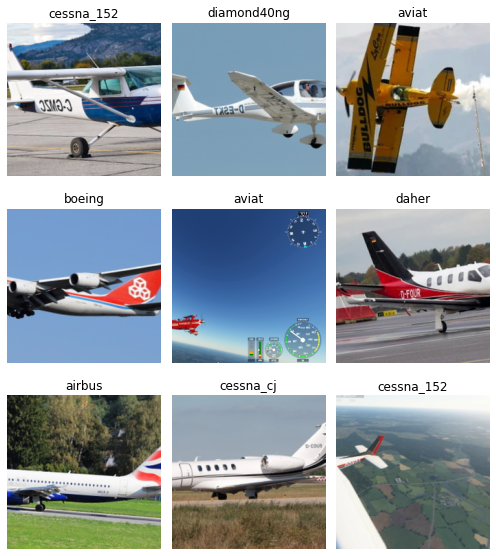

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['airbus',
  'aviat',
  'boeing',
  'cessna_152',
  'cessna_172',
  'cessna_208',
  'cessna_cj',
  'cubcraft',
  'daher',
  'diamond40ng',
  'diamondda62',
  'extra'],
 12,
 3591,
 897)

## Train model

In [13]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [14]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,2.466641,1.166681,0.624303,12:51
1,1.672119,0.875487,0.715719,12:48
2,1.207736,0.700581,0.763657,12:42
3,0.952872,0.625377,0.777035,12:34
4,0.823706,0.602705,0.787068,12:35


In [15]:
interp = ClassificationInterpretation.from_learner(learn)

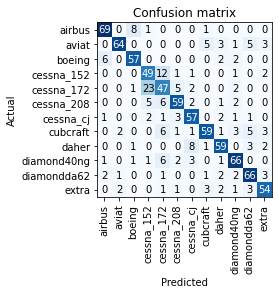

In [16]:
interp.plot_confusion_matrix()

In [22]:
# Selecting one picture for visualization  (requires authorisation)
# drive.mount('/content/drive')
#path = "data/cats/airbus/00000001.jpg"
#path
#img = open_image(path)
#img
#pred_class,pred_idx,outputs = learn.predict(img)
#data.classes[int(pred_class)]

In [21]:
warnings.filterwarnings('ignore')

tulemused = []
correct_labels = []
for i in listdir("random_selection_test"):
  for j in listdir("random_selection_test" + "/" + i):
    correct_labels.append(i)
    img = open_image("random_selection_test/" + i +"/" + j)
    pred_class,pred_idx,outputs = learn.predict(img)
    vastus = data.classes[int(pred_class)]
    tulemused = np.append(tulemused, vastus)

accuracy = sum(tulemused == correct_labels)/len(correct_labels)

print("Mixed accuracy: " + str(accuracy))


Mixed accuracy: 0.8861111111111111


In [ ]:
pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")


In [ ]:
# ENAM EI KEHTI??

In [ ]:
#from os import listdir
#import warnings

#selection_size = 400
#clear_images = listdir("msf_data/image_data_rainy/")
#warnings.filterwarnings('ignore')

#tulemused = []
#random_selection = np.random.random_integers(0, len(clear_images) -1, size = selection_size)
#for i in random_selection:
#  path =  "msf_data/image_data_rainy/" + str(clear_images[i])
#  img = open_image(path)
#  pred_class,pred_idx,outputs = learn.predict(img)
#  vastus = data.classes[int(pred_class)]
#  tulemused = np.append(tulemused, vastus)
#correct_labels = np.array([x.split("_rainy")[0] for x in clear_images])[random_selection]
#accuracy = sum(tulemused == correct_labels)/len(correct_labels)
#print("Rainy weather accuracy: " + str(accuracy))

#pd.DataFrame({"correct": correct_labels, "prediction": tulemused}).sort_values("correct")
